# **Project Name**    -  Cardiovascular Risk Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

Cardiovascular Risk Prediction: Enhancing Cardiovascular Disease Prevention through Advanced Risk Assessment

Cardiovascular diseases (CVDs) continue to be a leading cause of morbidity and mortality worldwide. As our understanding of the complex interplay of risk factors and underlying mechanisms grows, so does the need for more accurate and personalized methods of cardiovascular risk prediction. The ability to effectively assess an individual's risk of developing CVDs not only facilitates early intervention and treatment but also empowers individuals to make informed lifestyle choices. This summary delves into the significance of cardiovascular risk prediction, recent advancements in the field, and the potential impact on preventive strategies.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/kaushikk1999/Cardiovascular-Risk-Prediction.git

# **Problem Statement**


**Write Problem Statement Here.**

Cardiovascular diseases (CVDs) have emerged as a leading cause of mortality and morbidity worldwide, imposing a significant burden on healthcare systems and individuals. Early identification of individuals at high risk of developing cardiovascular events is crucial for timely intervention and personalized medical care. While traditional risk assessment tools, such as the Framingham Risk Score, have provided valuable insights, there is a growing need for more accurate and individualized prediction models that leverage advanced data analysis techniques and incorporate a broader range of risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

In [2]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [132]:

# Import Libraries
import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px 
import numpy as np
import pandas as pd
import re
# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
#from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing SMOTE for handling class imbalance.
from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import norm 

### Dataset Loading

In [4]:
# Load Dataset

In [5]:

# Imported data_cardiovascular_risk.csv
df = pd.read_csv(r'C:\\Users\\yokau\\Downloads\\data_cardiovascular_risk.csv')

### Dataset First View

In [6]:
# Dataset First Look

In [108]:
df

id  age  education sex smoker  cigs_per_day  BPMeds  prevalent_stroke  \
0        0   64        2.0   F    YES           3.0     0.0                 0   
1        1   36        4.0   M     NO           0.0     0.0                 0   
2        2   46        1.0   F    YES          10.0     0.0                 0   
3        3   50        1.0   M    YES          20.0     0.0                 0   
4        4   64        1.0   F    YES          30.0     0.0                 0   
...    ...  ...        ...  ..    ...           ...     ...               ...   
3385  3385   60        1.0   F     NO           0.0     0.0                 0   
3386  3386   46        1.0   F     NO           0.0     0.0                 0   
3387  3387   44        3.0   M    YES           3.0     0.0                 0   
3388  3388   60        1.0   M     NO           0.0     NaN                 0   
3389  3389   54        3.0   F     NO           0.0     0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                 0         0              221.0        148.0          85.0   
1                 1         0              212.0        168.0          98.0   
2                 0         0              250.0        116.0          71.0   
3                 1         0              233.0        158.0          88.0   
4                 0         0              241.0        136.5          85.0   
...             ...       ...                ...          ...           ...   
3385              0         0              261.0        123.5          79.0   
3386              0         0              199.0        102.0          56.0   
3387              1         0              352.0        164.0         119.0   
3388              1         0              191.0        167.0         105.0   
3389              0         0              288.0        124.0          77.0   

        BMI  heart_rate  glucose  ten_year_chd  
0       NaN        90.0     80.0             1  
1     29.77        72.0     75.0             0  
2     20.35        88.0     94.0             0  
3     28.26        68.0     94.0             1  
4     26.42        70.0     77.0             0  
...     ...         ...      ...           ...  
3385  29.28        70.0    103.0             0  
3386  21.96        80.0     84.0             0  
3387  28.92        73.0     72.0             1  
3388  23.01        80.0     85.0             0  
3389  29.88        79.0     92.0             0  

[3390 rows x 17 columns]

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count

In [9]:
df.shape

(3390, 17)

### Dataset Information

In [10]:
# Dataset Info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count

In [13]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count

In [15]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [16]:
missing_values(df)

index  Missing Values  % of Total Values Data_type
0           glucose             304               8.97   float64
1         education              87               2.57   float64
2            BPMeds              44               1.30   float64
3           totChol              38               1.12   float64
4        cigsPerDay              22               0.65   float64
5               BMI              14               0.41   float64
6         heartRate               1               0.03   float64
7                id               0               0.00     int64
8             diaBP               0               0.00   float64
9             sysBP               0               0.00   float64
10     prevalentHyp               0               0.00     int64
11         diabetes               0               0.00     int64
12              age               0               0.00     int64
13  prevalentStroke               0               0.00     int64
14       is_smoking               0               0.00    object
15              sex               0               0.00    object
16       TenYearCHD               0               0.00     int64

In [17]:
# Visualizing the missing values

<Axes: >

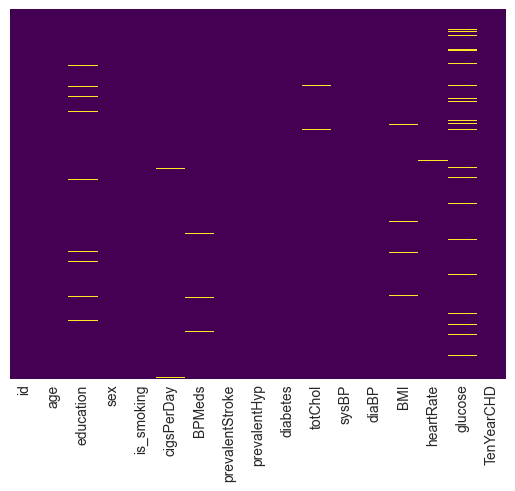

In [18]:

sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

### What did you know about your dataset?

Answer Here

there are few null values in most of the columns

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns

In [20]:
pip install Pillow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Demographic:
Sex: male or female("M" or "F")
Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
BP Meds: whether or not the patient was on blood pressure medication (Nominal)
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

Tot Chol: total cholesterol level (Continuous)
Sys BP: systolic blood pressure (Continuous)
Dia BP: diastolic blood pressure (Continuous)
BMI: Body Mass Index (Continuous)
Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

Glucose: glucose level (Continuous)
Predict variable (desired target)

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -

In [21]:
# Dataset Describe

In [22]:
df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable.

In [24]:

def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique Values: {unique_values}")
        print("--------")

# Assuming you have the DataFrame 'df' containing your dataset
display_unique_values(df)

Column: id
Unique Values: [   0    1    2 ... 3387 3388 3389]
--------
Column: age
Unique Values: [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
--------
Column: education
Unique Values: [ 2.  4.  1.  3. nan]
--------
Column: sex
Unique Values: ['F' 'M']
--------
Column: is_smoking
Unique Values: ['YES' 'NO']
--------
Column: cigsPerDay
Unique Values: [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
--------
Column: BPMeds
Unique Values: [ 0. nan  1.]
--------
Column: prevalentStroke
Unique Values: [0 1]
--------
Column: prevalentHyp
Unique Values: [0 1]
--------
Column: diabetes
Unique Values: [0 1]
--------
Column: totChol
Unique Values: [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 279. 273. 252.
 198. 266. 216. 237. 193. 293. 180. 206. 215. 208. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
# Write your code to make your dataset analysis ready.

In [26]:

# Renamed columns smoker
df.rename(columns={'is_smoking': 'smoker'}, inplace=True)

# Renamed columns cigs_per_day
df.rename(columns={'cigsPerDay': 'cigs_per_day'}, inplace=True)

# Renamed columns prevalent_stroke
df.rename(columns={'prevalentStroke': 'prevalent_stroke'}, inplace=True)

# Renamed columns prevalent_hyp
df.rename(columns={'prevalentHyp': 'prevalent_hyp'}, inplace=True)

# Renamed columns total_cholesterol
df.rename(columns={'totChol': 'total_cholesterol'}, inplace=True)

# Renamed columns systolic_bp
df.rename(columns={'sysBP': 'systolic_bp'}, inplace=True)

# Renamed columns diastolic_bp
df.rename(columns={'diaBP': 'diastolic_bp'}, inplace=True)

# Renamed columns heart_rate
df.rename(columns={'heartRate': 'heart_rate'}, inplace=True)

# Renamed columns ten_year_chd
df.rename(columns={'TenYearCHD': 'ten_year_chd'}, inplace=True)


In [27]:
a=list(df.age.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]


In [28]:
a=list(df.sex.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['F', 'M']


In [29]:
a=list(df.smoker.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['NO', 'YES']


In [30]:
a=list(df.education.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[nan, 1.0, 2.0, 3.0, 4.0]


In [31]:
a=list(df.cigs_per_day.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 23.0, 25.0, 30.0, 35.0, 38.0, 40.0, 43.0, 45.0, 50.0, 60.0, 70.0]


In [32]:
a=list(df.BPMeds.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[0.0, 1.0, nan]


In [33]:
a=list(df.prevalent_stroke.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[0, 1]


In [34]:
a=list(df.prevalent_hyp.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[0, 1]


In [35]:
a=list(df.diabetes.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[0, 1]


In [36]:
a=list(df.total_cholesterol.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[432.0, 600.0, nan, 107.0, 113.0, 119.0, 124.0, 126.0, 129.0, 133.0, 135.0, 137.0, 140.0, 143.0, 144.0, 145.0, 148.0, 149.0, 150.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 213.0, 214.0, 215.0, 216.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0, 233.0, 234.0, 235.0, 236.0, 237.0, 238.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 249.0, 250.0, 251.0, 252.0, 253.0, 254.0, 255.0, 256.0, 257.0, 258.0, 259.0, 260.0, 261.0, 262.0, 263.0, 264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 

In [37]:
a=list(df.systolic_bp.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[83.5, 85.0, 85.5, 90.0, 92.5, 93.0, 93.5, 94.0, 95.0, 95.5, 96.0, 96.5, 97.0, 97.5, 98.0, 99.0, 99.5, 100.0, 100.5, 101.0, 101.5, 102.0, 102.5, 103.0, 104.0, 104.5, 105.0, 105.5, 106.0, 106.5, 107.0, 107.5, 108.0, 108.5, 109.0, 109.5, 110.0, 110.5, 111.0, 111.5, 112.0, 112.5, 113.0, 113.5, 114.0, 114.5, 115.0, 115.5, 116.0, 116.5, 117.0, 117.5, 118.0, 118.5, 119.0, 119.5, 120.0, 120.5, 121.0, 121.5, 122.0, 122.5, 123.0, 123.5, 124.0, 124.5, 125.0, 125.5, 126.0, 126.5, 127.0, 127.5, 128.0, 128.5, 129.0, 129.5, 130.0, 130.5, 131.0, 131.5, 132.0, 132.5, 133.0, 133.5, 134.0, 134.5, 135.0, 135.5, 136.0, 136.5, 137.0, 137.5, 138.0, 138.5, 139.0, 139.5, 140.0, 140.5, 141.0, 141.5, 142.0, 142.5, 143.0, 143.5, 144.0, 144.5, 145.0, 145.5, 146.0, 146.5, 147.0, 147.5, 148.0, 148.5, 149.0, 149.5, 150.0, 150.5, 151.0, 151.5, 152.0, 152.5, 153.0, 153.5, 154.0, 154.5, 155.0, 155.5, 156.0, 156.5, 157.0, 157.5, 158.0, 158.5, 159.0, 159.5, 160.0, 160.5, 161.0, 161.5, 162.0, 162.5, 163.0, 163.5, 164.0, 1

In [38]:
a=list(df.diastolic_bp.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[48.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 57.5, 58.0, 59.0, 59.5, 60.0, 60.5, 61.0, 61.5, 62.0, 62.5, 63.0, 63.5, 64.0, 64.5, 65.0, 65.5, 66.0, 66.5, 67.0, 67.5, 68.0, 68.5, 69.0, 69.5, 70.0, 70.5, 71.0, 71.5, 72.0, 72.5, 73.0, 73.5, 74.0, 74.5, 75.0, 75.5, 76.0, 76.5, 77.0, 77.5, 78.0, 78.5, 79.0, 79.5, 80.0, 80.5, 81.0, 81.5, 82.0, 82.5, 83.0, 83.5, 84.0, 84.5, 85.0, 85.5, 86.0, 86.5, 87.0, 87.5, 88.0, 88.5, 89.0, 89.5, 90.0, 90.5, 91.0, 91.5, 92.0, 92.5, 93.0, 93.5, 94.0, 94.5, 95.0, 95.5, 96.0, 96.5, 97.0, 97.5, 98.0, 98.5, 99.0, 99.5, 100.0, 100.5, 101.0, 101.5, 102.0, 102.5, 103.0, 103.5, 104.0, 104.5, 105.0, 105.5, 106.0, 106.5, 107.0, 107.5, 108.0, 108.5, 109.0, 109.5, 110.0, 110.5, 111.0, 112.0, 112.5, 113.0, 114.0, 115.0, 115.5, 116.0, 117.0, 117.5, 118.0, 119.0, 120.0, 121.0, 122.5, 123.0, 124.0, 124.5, 125.0, 127.5, 128.0, 129.0, 130.0, 133.0, 135.0, 136.0, 142.5]


In [39]:
a=list(df.BMI.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[15.96, 16.48, 16.59, 16.61, 16.69, 16.71, 16.73, 16.75, 16.92, 16.98, 17.17, 17.23, 17.38, 17.44, 17.5, 17.51, 17.61, 17.64, 17.68, 17.71, 17.81, 17.84, 17.89, 17.92, 17.93, 18.0, 18.01, 18.06, 18.09, 18.1, 18.16, 18.18, 18.21, 18.23, 18.26, 18.3, 18.38, 18.4, 18.44, 18.46, 18.48, 18.52, 18.53, 18.55, 18.58, 18.59, 18.62, 18.63, 18.64, 18.65, 18.68, 18.7, 18.73, 18.75, 18.76, 18.8, 18.82, 18.83, 18.84, 28.24, 28.49, 28.74, 29.49, 29.99, 30.24, 30.74, 31.24, 31.74, nan, 18.87, 18.88, 18.98, 18.99, 19.0, 19.03, 19.05, 19.09, 19.12, 19.14, 19.16, 19.18, 19.2, 19.22, 19.23, 19.24, 19.25, 19.26, 19.27, 19.28, 19.34, 19.36, 19.37, 19.38, 19.42, 19.44, 19.46, 19.47, 19.48, 19.5, 19.53, 19.54, 19.56, 19.57, 19.61, 19.63, 19.64, 19.66, 19.68, 19.69, 19.7, 19.71, 19.72, 19.74, 19.76, 19.78, 19.8, 19.81, 19.82, 19.83, 19.87, 19.88, 19.91, 19.93, 19.94, 19.97, 19.98, 19.99, 20.0, 20.02, 20.05, 20.06, 20.09, 20.1, 20.11, 20.12, 20.13, 20.15, 20.17, 20.19, 20.2, 20.22, 20.23, 20.24, 20.25, 20.26, 2

In [40]:
a=list(df.heart_rate.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[45.0, 47.0, 48.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, nan, 100.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 110.0, 112.0, 115.0, 120.0, 122.0, 125.0, 140.0, 143.0]


In [41]:
a=list(df.glucose.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[40.0, 43.0, 44.0, 45.0, 47.0, 48.0, 50.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, nan, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 129.0, 131.0, 132.0, 135.0, 136.0, 137.0, 140.0, 142.0, 145.0, 147.0, 148.0, 150.0, 155.0, 163.0, 166.0, 167.0, 170.0, 172.0, 173.0, 177.0, 183.0, 186.0, 191.0, 193.0, 205.0, 206.0, 210.0, 215.0, 216.0, 223.0, 225.0, 235.0, 244.0, 248.0, 254.0, 255.0, 256.0, 260.0, 268.0, 270.0, 274.0, 294.0, 297.0, 320.0, 332.0, 348.0, 368.0, 386.0, 394.0]


In [42]:
a=list(df.ten_year_chd.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

[0, 1]


### What all manipulations have you done and insights you found?

changed names of few columns and checked for unique values in each columns

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [43]:
# Chart - 1 visualization code

<Axes: >

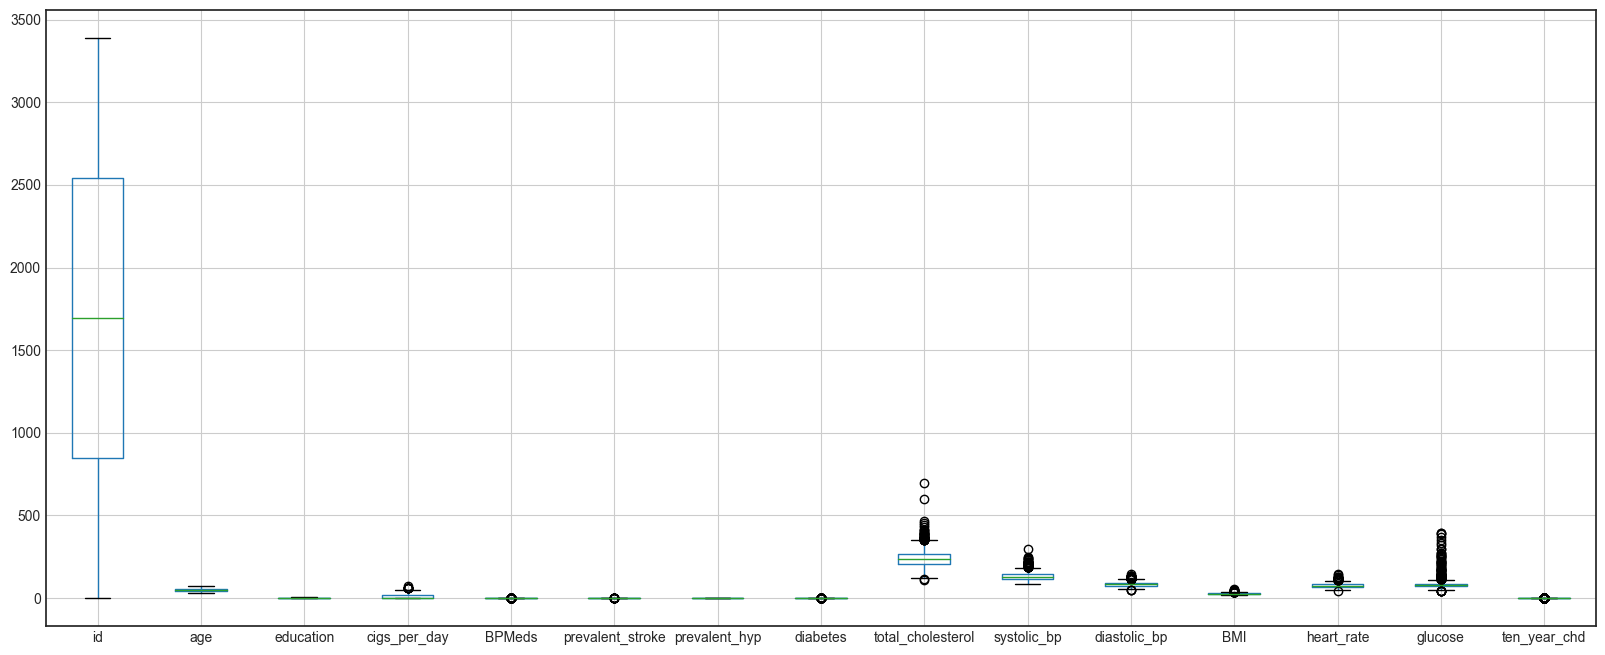

In [44]:

plt.figure(figsize=(20,8))
df.boxplot()

##### 1. Why did you pick the specific chart?

Answer Here.

to see outliers

##### 2. What is/are the insight(s) found from the chart?

Answer Here

there are few outliers in each columns

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

these outliers are having neative effect and should be removed

#### Chart - 2

In [45]:
# Chart - 2 visualization code

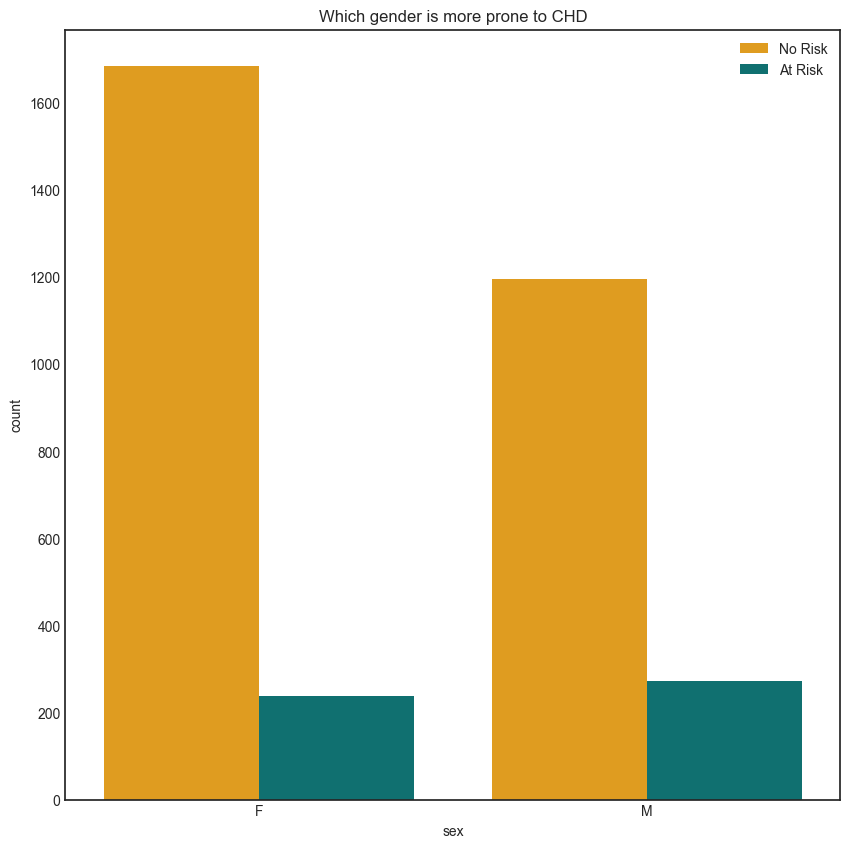

In [46]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = df['sex'], hue = df['ten_year_chd'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Which gender is prone to coronary heart disease?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

most females are not at risk 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

males have slightly high rate of risk than females

#### Chart - 3

In [47]:
# Chart - 3 visualization code

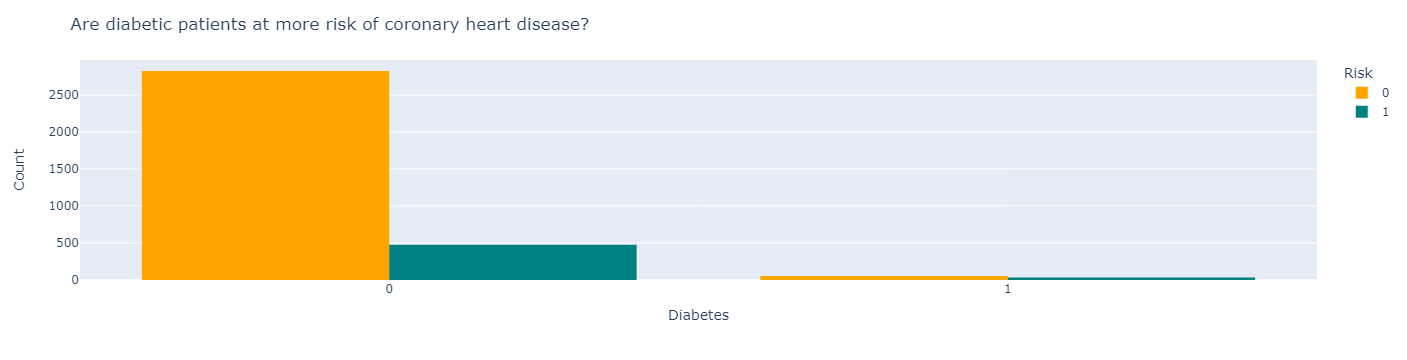

In [48]:
import plotly.express as px
import pandas as pd


# Define your palette
my_palette = {0: 'orange', 1: 'teal'}

# Create the count plot using Plotly
fig = px.histogram(
    df, x='diabetes', color='ten_year_chd', barmode='group',
    category_orders={'diabetes': [0, 1], 'ten_year_chd': [0, 1]},
    color_discrete_map=my_palette
)

# Update axis labels and legend titles
fig.update_layout(
    title="Are diabetic patients at more risk of coronary heart disease?",
    xaxis_title="Diabetes",
    yaxis_title="Count",
    legend_title="Risk"
)

# Show the interactive plot
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.
Are diabetic patients at more risk of coronary heart disease ??

##### 2. What is/are the insight(s) found from the chart?

Answer Here

people who are having diabetes are more likely to have cdh

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

people having diabetes should be more careful with there health

#### Chart - 4

In [49]:
# Chart - 4 visualization code

In [50]:
df

id  age  education sex smoker  cigs_per_day  BPMeds  prevalent_stroke  \
0        0   64        2.0   F    YES           3.0     0.0                 0   
1        1   36        4.0   M     NO           0.0     0.0                 0   
2        2   46        1.0   F    YES          10.0     0.0                 0   
3        3   50        1.0   M    YES          20.0     0.0                 0   
4        4   64        1.0   F    YES          30.0     0.0                 0   
...    ...  ...        ...  ..    ...           ...     ...               ...   
3385  3385   60        1.0   F     NO           0.0     0.0                 0   
3386  3386   46        1.0   F     NO           0.0     0.0                 0   
3387  3387   44        3.0   M    YES           3.0     0.0                 0   
3388  3388   60        1.0   M     NO           0.0     NaN                 0   
3389  3389   54        3.0   F     NO           0.0     0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                 0         0              221.0        148.0          85.0   
1                 1         0              212.0        168.0          98.0   
2                 0         0              250.0        116.0          71.0   
3                 1         0              233.0        158.0          88.0   
4                 0         0              241.0        136.5          85.0   
...             ...       ...                ...          ...           ...   
3385              0         0              261.0        123.5          79.0   
3386              0         0              199.0        102.0          56.0   
3387              1         0              352.0        164.0         119.0   
3388              1         0              191.0        167.0         105.0   
3389              0         0              288.0        124.0          77.0   

        BMI  heart_rate  glucose  ten_year_chd  
0       NaN        90.0     80.0             1  
1     29.77        72.0     75.0             0  
2     20.35        88.0     94.0             0  
3     28.26        68.0     94.0             1  
4     26.42        70.0     77.0             0  
...     ...         ...      ...           ...  
3385  29.28        70.0    103.0             0  
3386  21.96        80.0     84.0             0  
3387  28.92        73.0     72.0             1  
3388  23.01        80.0     85.0             0  
3389  29.88        79.0     92.0             0  

[3390 rows x 17 columns]

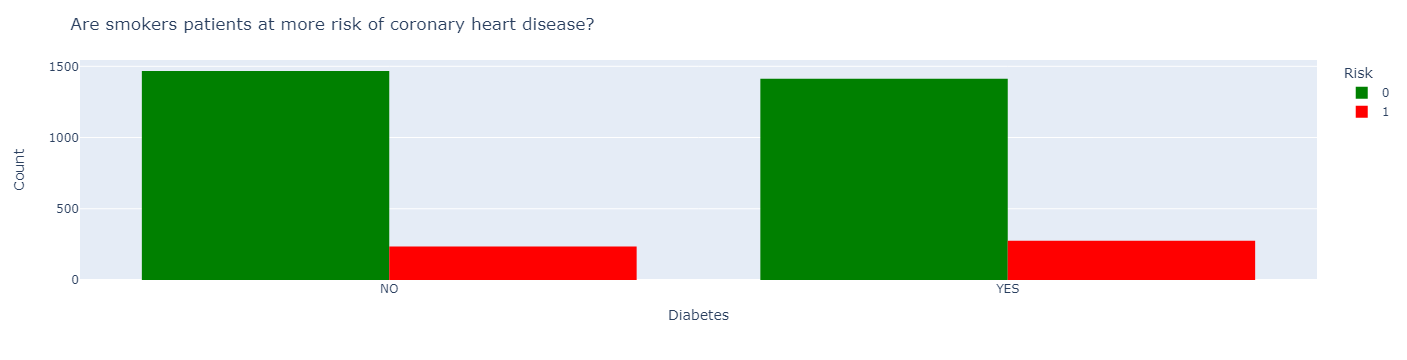

In [51]:
# Define your palette
my_palette = {0: 'green', 1: 'red'}

# Create the count plot using Plotly
fig = px.histogram(
    df, x='smoker', color='ten_year_chd', barmode='group',
    category_orders={'diabetes': [0, 1], 'ten_year_chd': [0, 1]},
    color_discrete_map=my_palette
)

# Update axis labels and legend titles
fig.update_layout(
    title="Are smokers patients at more risk of coronary heart disease?",
    xaxis_title="Diabetes",
    yaxis_title="Count",
    legend_title="Risk"
)

# Show the interactive plot
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Are smoking patients at more risk of coronary heart disease?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

the count for both smokers or not not having much effects on chd

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

smoking is not important to consider for finding chd

#### Chart - 5

In [52]:
# Chart - 5 visualization code

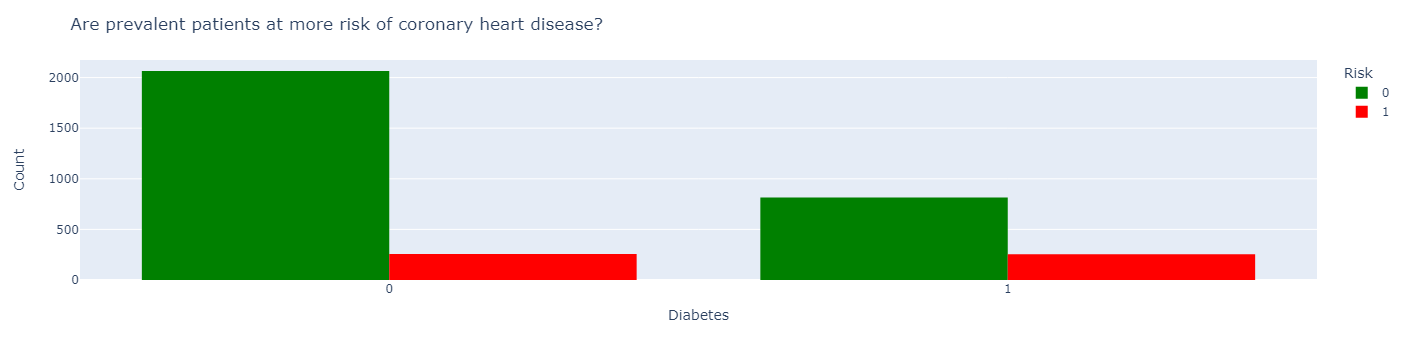

In [53]:
# Define your palette
my_palette = {0: 'green', 1: 'red'}

# Create the count plot using Plotly
fig = px.histogram(
    df, x='prevalent_hyp', color='ten_year_chd', barmode='group',
    category_orders={'diabetes': [0, 1], 'ten_year_chd': [0, 1]},
    color_discrete_map=my_palette
)

# Update axis labels and legend titles
fig.update_layout(
    title="Are prevalent patients at more risk of coronary heart disease?",
    xaxis_title="Diabetes",
    yaxis_title="Count",
    legend_title="Risk"
)

# Show the interactive plot
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.
Are prevalent patients at more risk of coronary heart disease?

##### 2. What is/are the insight(s) found from the chart?

Answer Here


the count for both  prevalent patients or not not having much effects on chd

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here


smoking is not important to consider for finding chd as it is not creating much difference

#### Chart - 6

In [54]:
# Chart - 6 visualization code

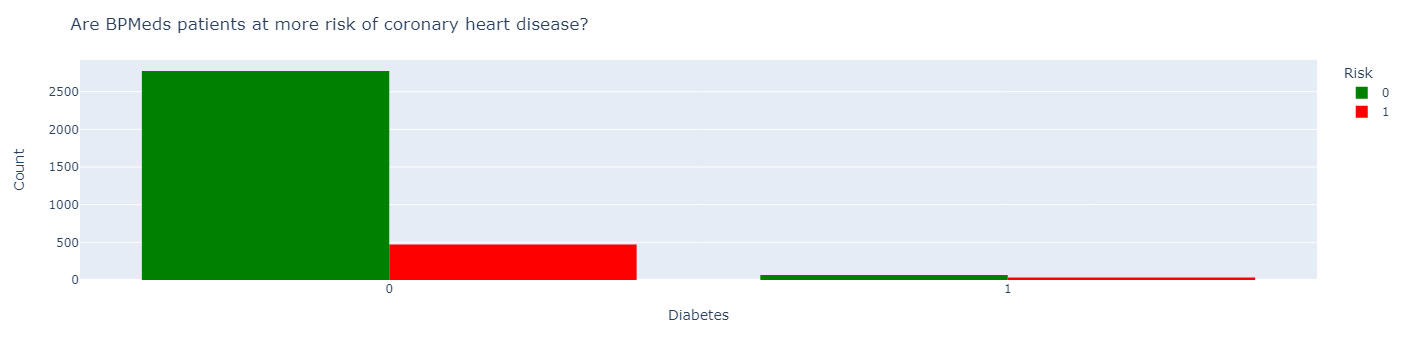

In [55]:
# Define your palette
my_palette = {0: 'green', 1: 'red'}

# Create the count plot using Plotly
fig = px.histogram(
    df, x='BPMeds', color='ten_year_chd', barmode='group',
    category_orders={'diabetes': [0, 1], 'ten_year_chd': [0, 1]},
    color_discrete_map=my_palette
)

# Update axis labels and legend titles
fig.update_layout(
    title="Are BPMeds patients at more risk of coronary heart disease?",
    xaxis_title="Diabetes",
    yaxis_title="Count",
    legend_title="Risk"
)

# Show the interactive plot
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Are BPMeds patients at more risk of coronary heart disease?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

half patients suffering from Are BPMeds are liking to have chd

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

these people should be more carefully with there bp levels otherwise could suffer from chd

#### Chart - 7

In [56]:
# Chart - 7 visualization code

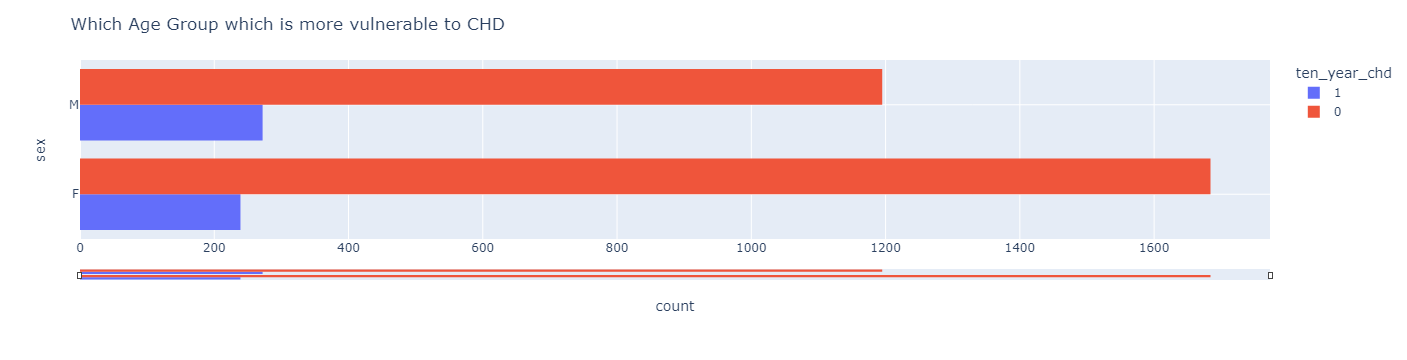

In [57]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(df, x='age', y='sex', color='ten_year_chd', histfunc='count')
fig.update_layout(
        title='Which Age Group which is more vulnerable to CHD', 
        xaxis = dict(
            showgrid=True, 
            rangeslider = dict(
                visible=True, 
                thickness=0.05
            )
        ), 
        yaxis = dict(
            showgrid=True
        ), 
        legend = dict(
            orientation='v'
        ), 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Which Age group is more vulnerable to coronary heart disease ?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

males silghtly are more  likely to have chd than females

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

males should be more carefull

#### Chart - 8

In [58]:
# Chart - 8 visualization code

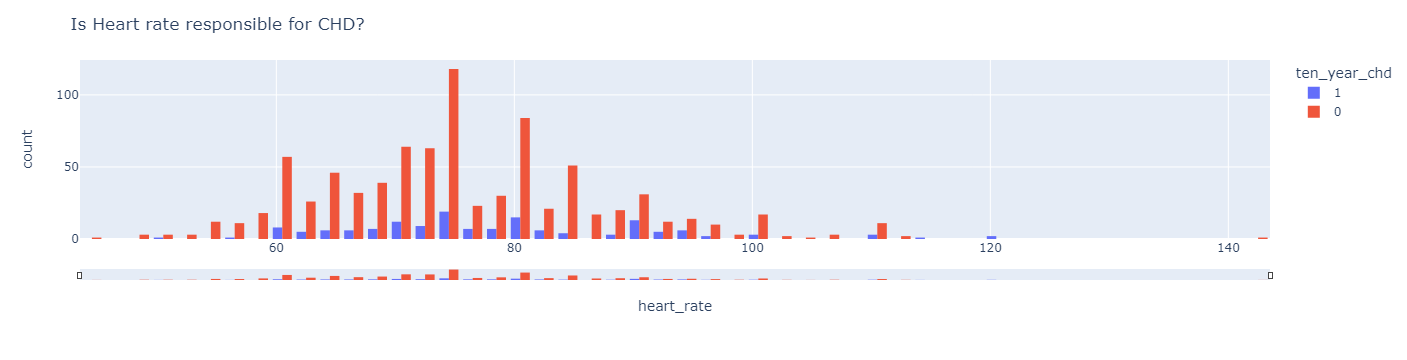

In [59]:
import plotly.express as px

# Filter the dataframe so that it does not crash the browser
df_filtered = df.head(1000)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.histogram(df_filtered, x='heart_rate', color='ten_year_chd', histfunc='count')
fig.update_layout(
        title='Is Heart rate responsible for CHD?', 
        xaxis = dict(
            showgrid=True, 
            rangeslider = dict(
                visible=True, 
                thickness=0.05
            )
        ), 
        yaxis = dict(
            showgrid=True
        ), 
        legend = dict(
            orientation='v'
        ), 
        barmode='group', 
        paper_bgcolor='#FFFFFF'
    )
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here.

Is Heart rate responsible for CHD?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

people after 60 years are more having chd

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

people more 60 years of age should take precautions more

#### Chart - 9

In [60]:
# Chart - 9 visualization code

In [61]:
df

id  age  education sex smoker  cigs_per_day  BPMeds  prevalent_stroke  \
0        0   64        2.0   F    YES           3.0     0.0                 0   
1        1   36        4.0   M     NO           0.0     0.0                 0   
2        2   46        1.0   F    YES          10.0     0.0                 0   
3        3   50        1.0   M    YES          20.0     0.0                 0   
4        4   64        1.0   F    YES          30.0     0.0                 0   
...    ...  ...        ...  ..    ...           ...     ...               ...   
3385  3385   60        1.0   F     NO           0.0     0.0                 0   
3386  3386   46        1.0   F     NO           0.0     0.0                 0   
3387  3387   44        3.0   M    YES           3.0     0.0                 0   
3388  3388   60        1.0   M     NO           0.0     NaN                 0   
3389  3389   54        3.0   F     NO           0.0     0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                 0         0              221.0        148.0          85.0   
1                 1         0              212.0        168.0          98.0   
2                 0         0              250.0        116.0          71.0   
3                 1         0              233.0        158.0          88.0   
4                 0         0              241.0        136.5          85.0   
...             ...       ...                ...          ...           ...   
3385              0         0              261.0        123.5          79.0   
3386              0         0              199.0        102.0          56.0   
3387              1         0              352.0        164.0         119.0   
3388              1         0              191.0        167.0         105.0   
3389              0         0              288.0        124.0          77.0   

        BMI  heart_rate  glucose  ten_year_chd  
0       NaN        90.0     80.0             1  
1     29.77        72.0     75.0             0  
2     20.35        88.0     94.0             0  
3     28.26        68.0     94.0             1  
4     26.42        70.0     77.0             0  
...     ...         ...      ...           ...  
3385  29.28        70.0    103.0             0  
3386  21.96        80.0     84.0             0  
3387  28.92        73.0     72.0             1  
3388  23.01        80.0     85.0             0  
3389  29.88        79.0     92.0             0  

[3390 rows x 17 columns]

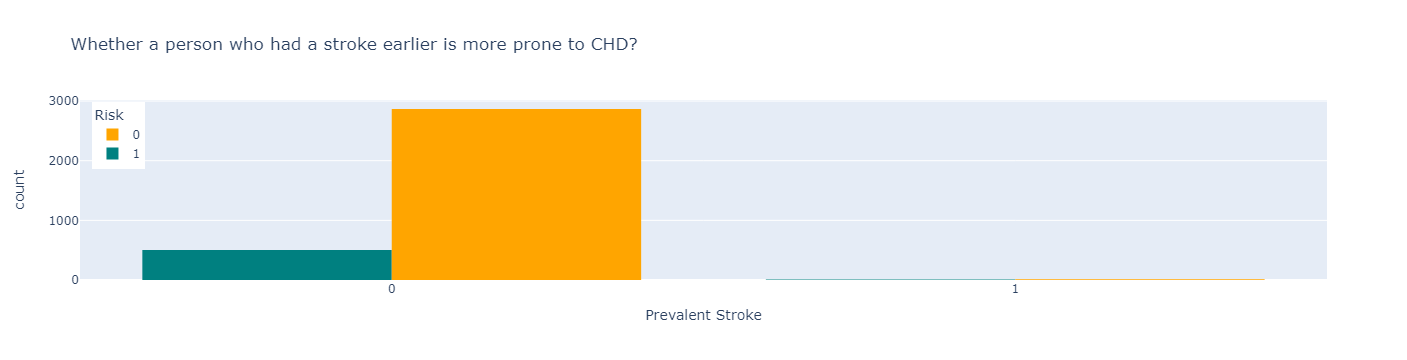

In [62]:
import plotly.express as px
import pandas as pd



# Define custom colors
colors = {0: 'orange', 1: 'teal'}

# Create the interactive count plot using Plotly
fig = px.histogram(df, x='prevalent_stroke', color='ten_year_chd', 
                   color_discrete_map=colors, 
                   barmode='group', 
                   category_orders={'prevalent_stroke': [0, 1]},
                   labels={'prevalent_stroke': 'Prevalent Stroke', 'ten_year_chd': 'Ten-Year CHD'},
                   title="Whether a person who had a stroke earlier is more prone to CHD?"
                  )

# Update legend labels
fig.update_layout(
    legend_title_text='Risk',
    legend_traceorder='reversed',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Show the Plotly figure
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

Whether a person who had a stroke earlier is more prone to CHD?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

a person who had a stroke earlier is more prone to CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

a person who had a stroke earlier should be more carefull and be away from any shock 

#### Chart - 10

In [63]:
# Chart - 10 visualization code

In [64]:
df

id  age  education sex smoker  cigs_per_day  BPMeds  prevalent_stroke  \
0        0   64        2.0   F    YES           3.0     0.0                 0   
1        1   36        4.0   M     NO           0.0     0.0                 0   
2        2   46        1.0   F    YES          10.0     0.0                 0   
3        3   50        1.0   M    YES          20.0     0.0                 0   
4        4   64        1.0   F    YES          30.0     0.0                 0   
...    ...  ...        ...  ..    ...           ...     ...               ...   
3385  3385   60        1.0   F     NO           0.0     0.0                 0   
3386  3386   46        1.0   F     NO           0.0     0.0                 0   
3387  3387   44        3.0   M    YES           3.0     0.0                 0   
3388  3388   60        1.0   M     NO           0.0     NaN                 0   
3389  3389   54        3.0   F     NO           0.0     0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                 0         0              221.0        148.0          85.0   
1                 1         0              212.0        168.0          98.0   
2                 0         0              250.0        116.0          71.0   
3                 1         0              233.0        158.0          88.0   
4                 0         0              241.0        136.5          85.0   
...             ...       ...                ...          ...           ...   
3385              0         0              261.0        123.5          79.0   
3386              0         0              199.0        102.0          56.0   
3387              1         0              352.0        164.0         119.0   
3388              1         0              191.0        167.0         105.0   
3389              0         0              288.0        124.0          77.0   

        BMI  heart_rate  glucose  ten_year_chd  
0       NaN        90.0     80.0             1  
1     29.77        72.0     75.0             0  
2     20.35        88.0     94.0             0  
3     28.26        68.0     94.0             1  
4     26.42        70.0     77.0             0  
...     ...         ...      ...           ...  
3385  29.28        70.0    103.0             0  
3386  21.96        80.0     84.0             0  
3387  28.92        73.0     72.0             1  
3388  23.01        80.0     85.0             0  
3389  29.88        79.0     92.0             0  

[3390 rows x 17 columns]

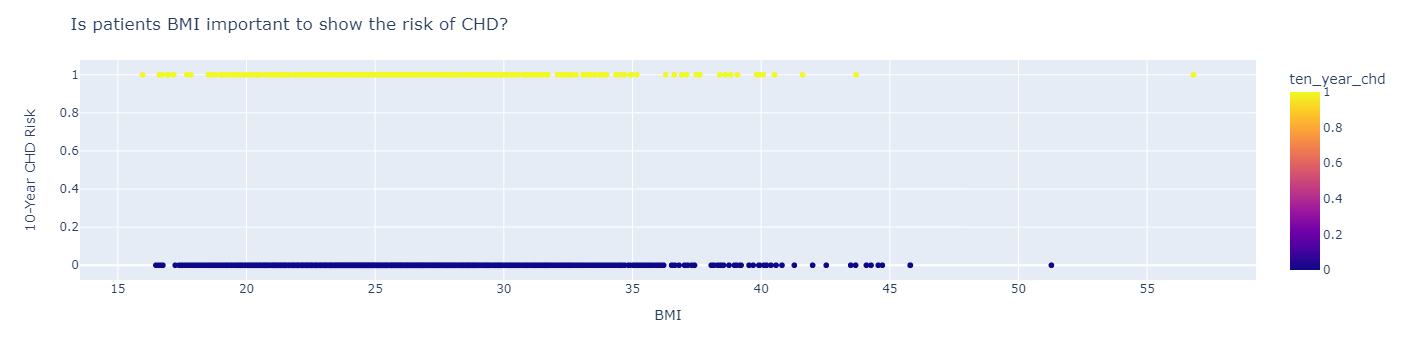

In [65]:
import plotly.express as px


fig = px.scatter(df, x='BMI', y='ten_year_chd', color='ten_year_chd',
              color_discrete_map={0: 'orange', 1: 'teal'})
fig.update_layout(title="Is patients BMI important to show the risk of CHD?",
                  xaxis_title="BMI", yaxis_title="10-Year CHD Risk")

fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

to see Is patients BMI important to show the risk of CHD?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

people with bmi between 20 to 35 are more likely to suffer with chd

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here



#### Chart - 11

In [66]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [67]:
# Chart - 12 visualization code

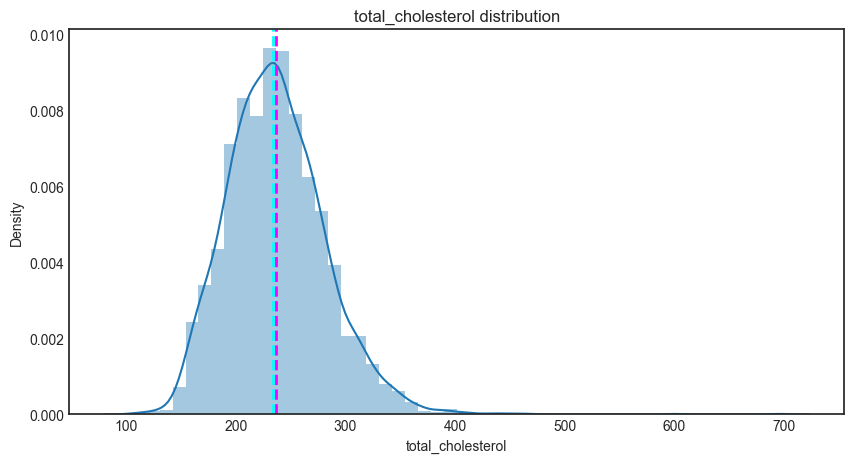

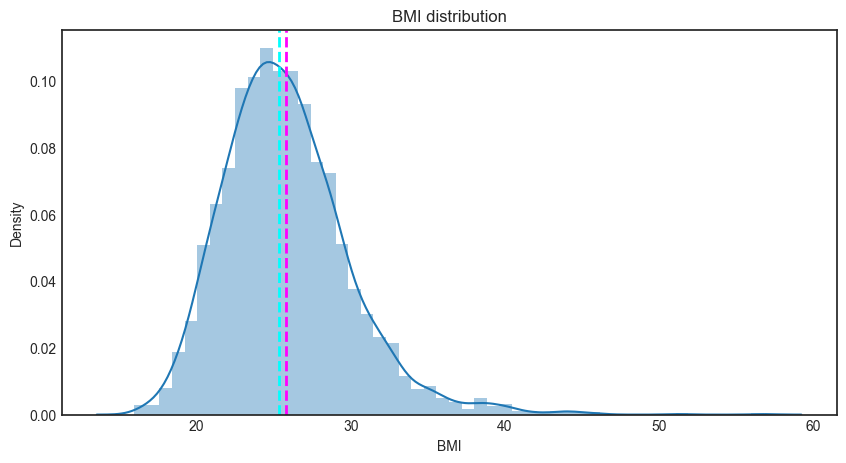

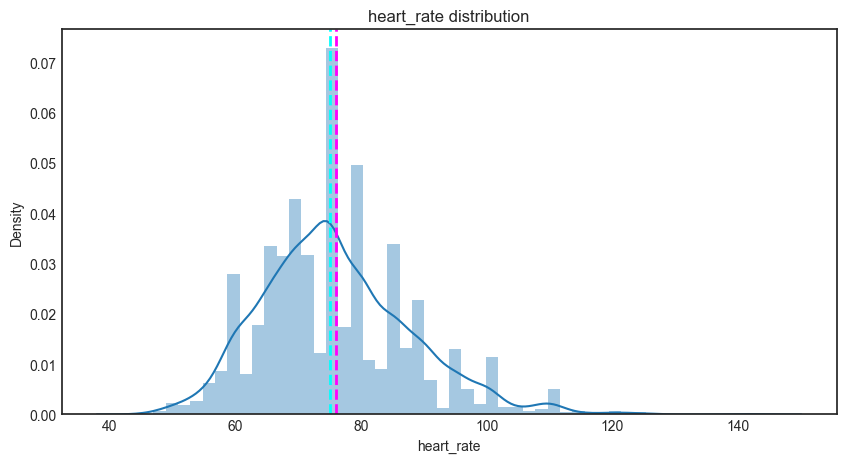

In [68]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['total_cholesterol','BMI','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.


Checking the distribution of the total_cholesterol, bmi, and heart_rate

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The total_cholestrol, bmi, and heart_rate columns are positively skewed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [69]:
# Chart - 13 visualization code

In [70]:
df

id  age  education sex smoker  cigs_per_day  BPMeds  prevalent_stroke  \
0        0   64        2.0   F    YES           3.0     0.0                 0   
1        1   36        4.0   M     NO           0.0     0.0                 0   
2        2   46        1.0   F    YES          10.0     0.0                 0   
3        3   50        1.0   M    YES          20.0     0.0                 0   
4        4   64        1.0   F    YES          30.0     0.0                 0   
...    ...  ...        ...  ..    ...           ...     ...               ...   
3385  3385   60        1.0   F     NO           0.0     0.0                 0   
3386  3386   46        1.0   F     NO           0.0     0.0                 0   
3387  3387   44        3.0   M    YES           3.0     0.0                 0   
3388  3388   60        1.0   M     NO           0.0     NaN                 0   
3389  3389   54        3.0   F     NO           0.0     0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                 0         0              221.0        148.0          85.0   
1                 1         0              212.0        168.0          98.0   
2                 0         0              250.0        116.0          71.0   
3                 1         0              233.0        158.0          88.0   
4                 0         0              241.0        136.5          85.0   
...             ...       ...                ...          ...           ...   
3385              0         0              261.0        123.5          79.0   
3386              0         0              199.0        102.0          56.0   
3387              1         0              352.0        164.0         119.0   
3388              1         0              191.0        167.0         105.0   
3389              0         0              288.0        124.0          77.0   

        BMI  heart_rate  glucose  ten_year_chd  
0       NaN        90.0     80.0             1  
1     29.77        72.0     75.0             0  
2     20.35        88.0     94.0             0  
3     28.26        68.0     94.0             1  
4     26.42        70.0     77.0             0  
...     ...         ...      ...           ...  
3385  29.28        70.0    103.0             0  
3386  21.96        80.0     84.0             0  
3387  28.92        73.0     72.0             1  
3388  23.01        80.0     85.0             0  
3389  29.88        79.0     92.0             0  

[3390 rows x 17 columns]

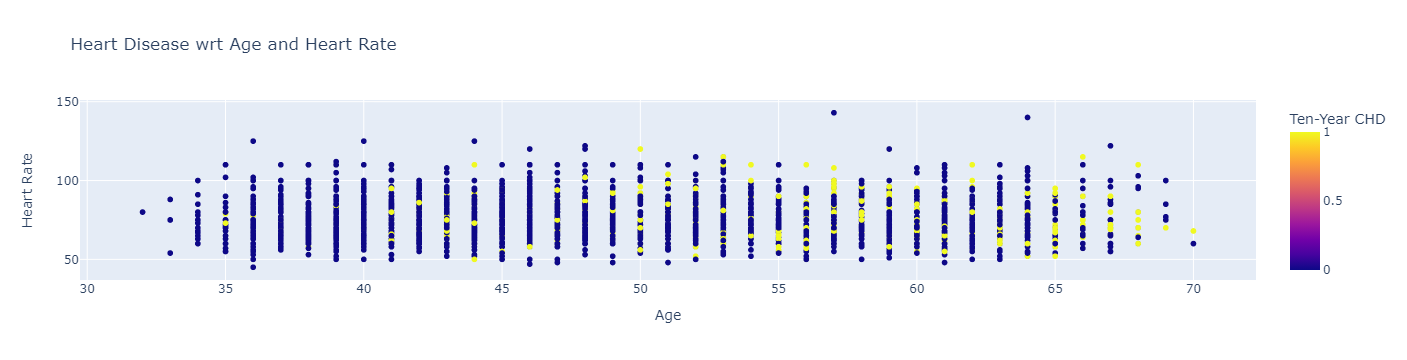

In [71]:
import plotly.express as px
import pandas as pd


# Create an interactive scatter plot using Plotly
fig = px.scatter(df, x='age', y='heart_rate', color='ten_year_chd', 
                 color_discrete_map={0: 'orange', 1: 'teal'},
                 title='Heart Disease wrt Age and Heart Rate',
                 labels={'age': 'Age', 'heart_rate': 'Heart Rate', 'ten_year_chd': 'Ten-Year CHD'},
                 category_orders={'ten_year_chd': [0, 1]},
                 hover_data={'ten_year_chd': True}
                )

# Customize layout
fig.update_layout(
    legend_title_text='CHD Risk',
    legend_traceorder='reversed',
    legend=dict(
        yanchor='top',
        y=0.99,
        xanchor='left',
        x=0.01
    )
)

# Show the Plotly figure
fig.show()


##### 1. Why did you pick the specific chart?

Answer Here.

to check Scatter plot between target varible wrt to age and heartRate

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is a clear relation between age and Heart Disease, with the increase in age the chance of heart disease increases. There is no significant relationship between heart disease and heart rate

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [72]:
# Correlation Heatmap visualization code


#Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.
cant plot heatmap as 


ValueError: could not convert string to float: 'F'

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [73]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [74]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [75]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [76]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [77]:
# Handling Missing Values & Missing Value Imputation

In [109]:
missing_values(df)

index  Missing Values  % of Total Values Data_type
0             glucose             304               8.97   float64
1           education              87               2.57   float64
2              BPMeds              44               1.30   float64
3   total_cholesterol              38               1.12   float64
4        cigs_per_day              22               0.65   float64
5                 BMI              14               0.41   float64
6          heart_rate               1               0.03   float64
7                  id               0               0.00     int64
8        diastolic_bp               0               0.00   float64
9         systolic_bp               0               0.00   float64
10      prevalent_hyp               0               0.00     int64
11           diabetes               0               0.00     int64
12                age               0               0.00     int64
13   prevalent_stroke               0               0.00     int64
14             smoker               0               0.00    object
15                sex               0               0.00    object
16       ten_year_chd               0               0.00     int64

In [113]:

# Missing Values Percentage
round(df.isna().sum()/len(df)*100, 2)

id                   0.00
age                  0.00
education            2.57
sex                  0.00
smoker               0.00
cigs_per_day         0.65
BPMeds               1.30
prevalent_stroke     0.00
prevalent_hyp        0.00
diabetes             0.00
total_cholesterol    1.12
systolic_bp          0.00
diastolic_bp         0.00
BMI                  0.41
heart_rate           0.03
glucose              8.97
ten_year_chd         0.00
dtype: float64

In [120]:
import pandas as pd



# Drop all rows that contain NaN values
df = df.dropna()

# Print the DataFrame
#print(df)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

Typically, we use other records to replace these null values. However, the entries in this dataset are person-specific. The values vary from person to person, and the dataset is related to the medical field in this particular instance. Consequently, removing rows with any null value is the most logical choice we have for dealing with such values

### 2. Handling Outliers

In [78]:
# Handling Outliers & Outlier treatments

In [122]:
 # making group of Numeric and Categorical features

numeric_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in df.columns:  
  if df[col].nunique() > 10:
    numeric_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['id', 'age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'BMI', 'heart_rate', 'glucose']
category feature : ['education', 'sex', 'smoker', 'BPMeds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd']


# checking for Skewness

In [123]:

# statistical summary
df.describe().T

count         mean         std     min     25%      50%  \
id                 2927.0  1692.869833  986.025198    1.00  836.50  1689.00   
age                2927.0    49.507345    8.597191   32.00   42.00    49.00   
education          2927.0     1.965494    1.017199    1.00    1.00     2.00   
cigs_per_day       2927.0     9.112743   11.882784    0.00    0.00     0.00   
BPMeds             2927.0     0.030065    0.170795    0.00    0.00     0.00   
prevalent_stroke   2927.0     0.006150    0.078192    0.00    0.00     0.00   
prevalent_hyp      2927.0     0.314315    0.464322    0.00    0.00     0.00   
diabetes           2927.0     0.026990    0.162082    0.00    0.00     0.00   
total_cholesterol  2927.0   237.129142   44.613282  113.00  206.00   234.00   
systolic_bp        2927.0   132.626409   22.326197   83.50  117.00   128.50   
diastolic_bp       2927.0    82.906218   12.078873   48.00   74.50    82.00   
BMI                2927.0    25.797041    4.130376   15.96   23.03    25.38   
heart_rate         2927.0    75.888282   11.971207   45.00   68.00    75.00   
glucose            2927.0    81.934404   24.106943   40.00   71.00    78.00   
ten_year_chd       2927.0     0.151691    0.358783    0.00    0.00     0.00   

                       75%     max  
id                 2547.50  3389.0  
age                  56.00    70.0  
education             3.00     4.0  
cigs_per_day         20.00    70.0  
BPMeds                0.00     1.0  
prevalent_stroke      0.00     1.0  
prevalent_hyp         1.00     1.0  
diabetes              0.00     1.0  
total_cholesterol   264.00   600.0  
systolic_bp         144.00   295.0  
diastolic_bp         90.00   142.5  
BMI                  28.04    56.8  
heart_rate           83.00   143.0  
glucose              87.00   394.0  
ten_year_chd          0.00     1.0

In [ ]:
# As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains 
#skewness and outliers.

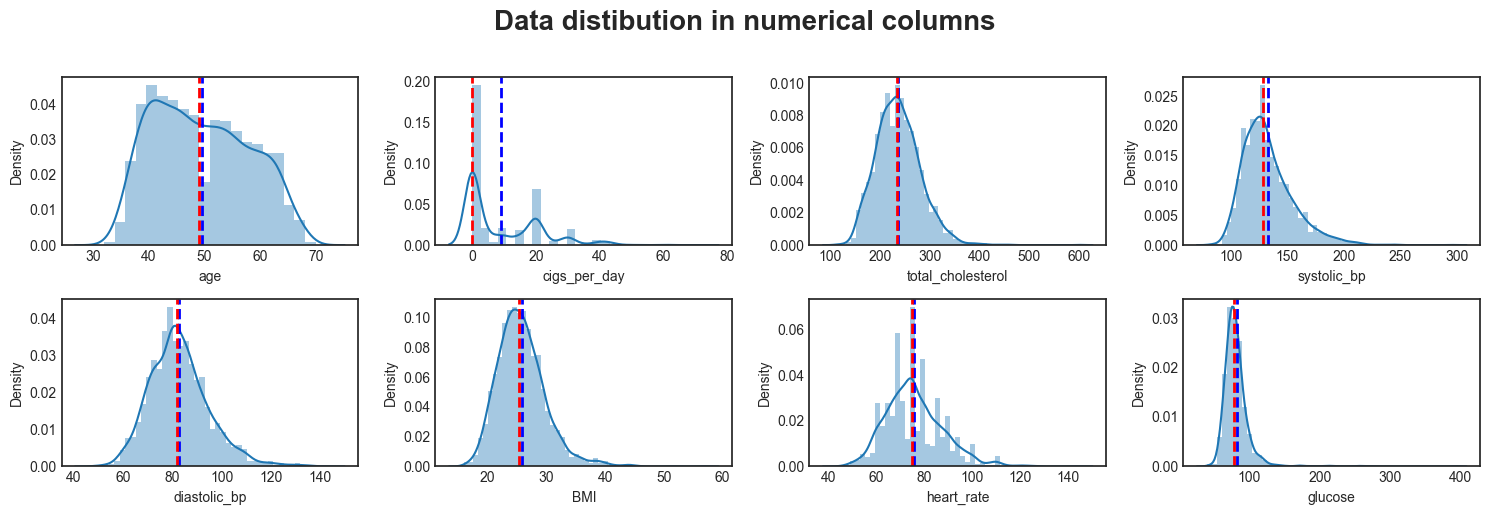

In [126]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i in range(1, len(numeric_features)):
  plt.subplot(2, 4, i)                      # subplots of 2 rows and 4 columns

  # distplot
  sns.distplot(df[numeric_features[i]]) 
  # mean line
  plt.axvline(df[numeric_features[i]].mean(), color='blue', linestyle='dashed', linewidth=2)
  # median line
  plt.axvline(df[numeric_features[i]].median(), color='red', linestyle='dashed', linewidth=2)   
  # x-axis label
  plt.xlabel(numeric_features[i])
  plt.tight_layout()


#
For numerical features, we can see that the majority of distributions are right-skewed. The distributions of totChol (total cholesterol) and BMI are roughly comparable. The distribution of glucose is highly skewed to the right. It demonstrates that glucose has many outliers.

Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we get rid of outliers, and then we check to see if we need to use the transformation technique again.

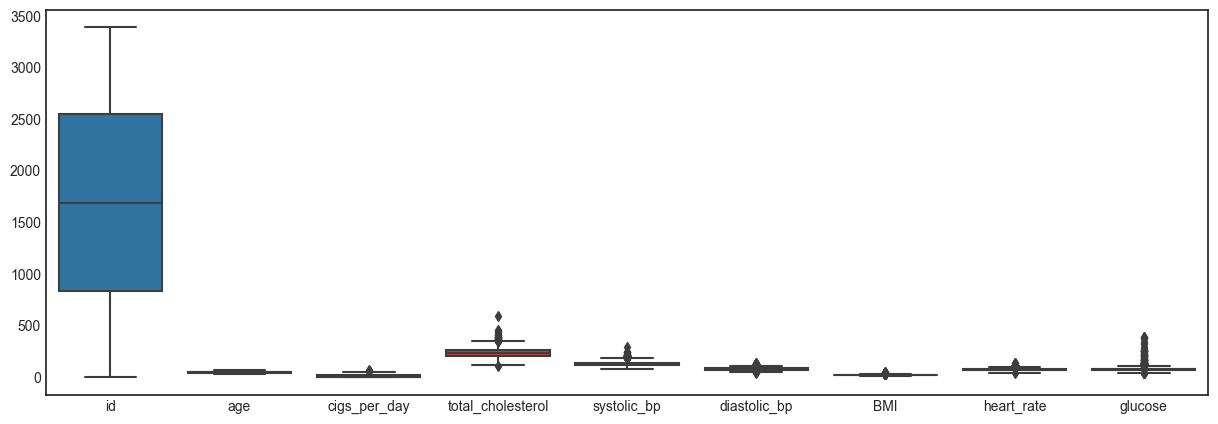

In [127]:

# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=df[numeric_features])
plt.show() 

In [128]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(df):
    for col in df[numeric_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [129]:

# using the function to treat outliers
df = clip_outliers(df)

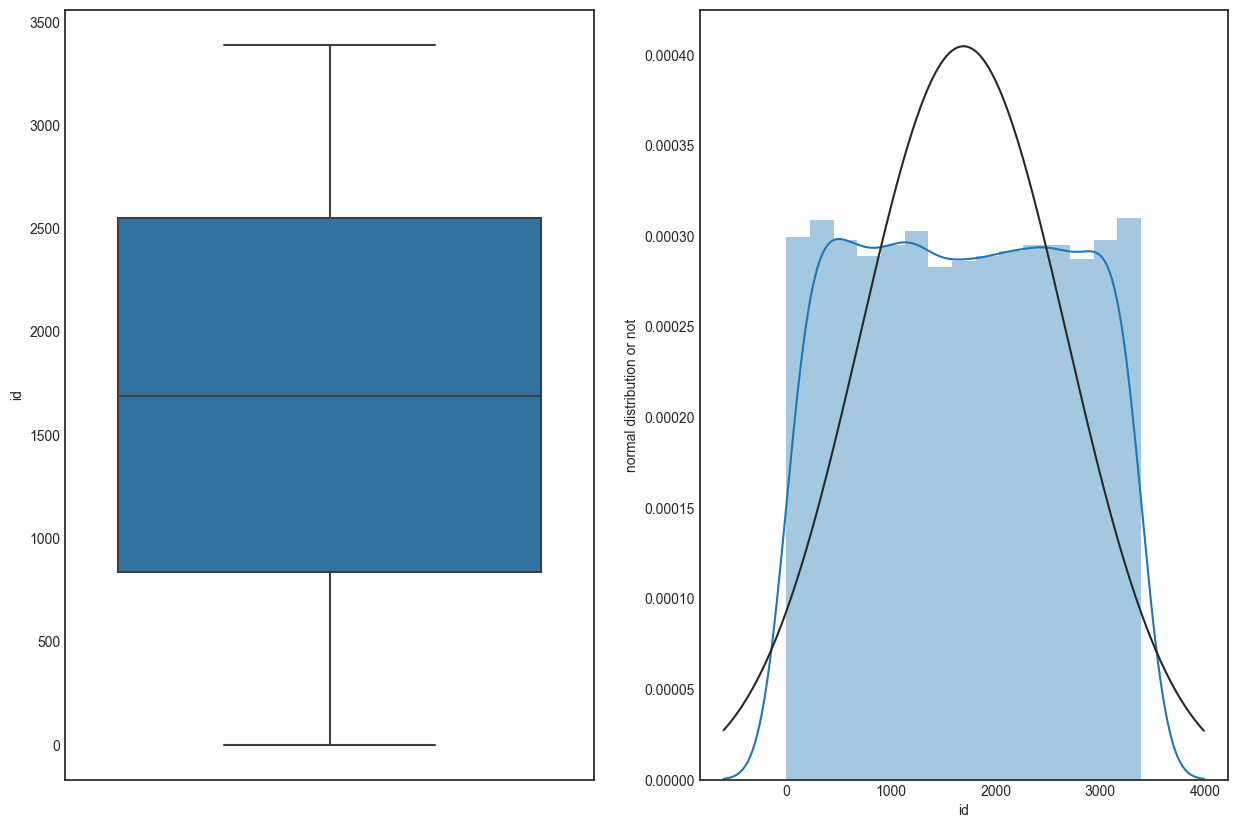

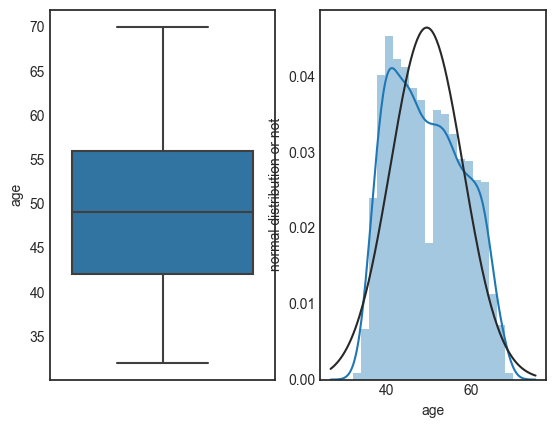

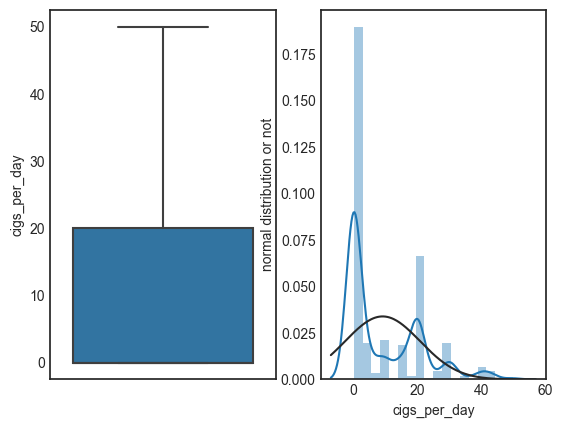

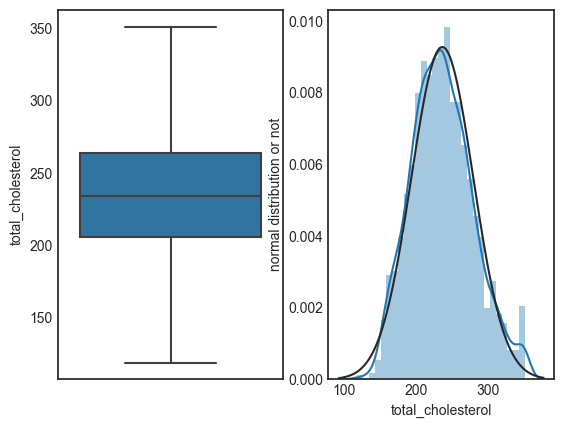

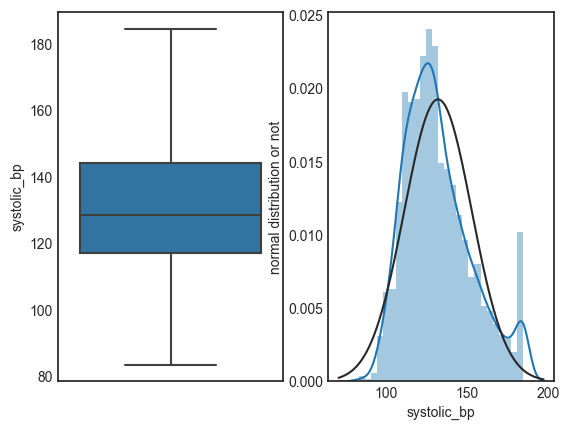

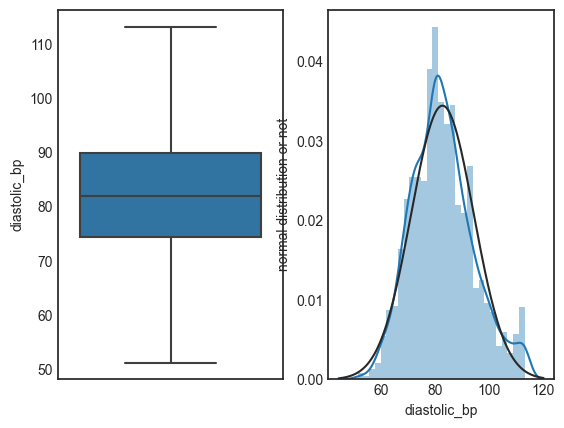

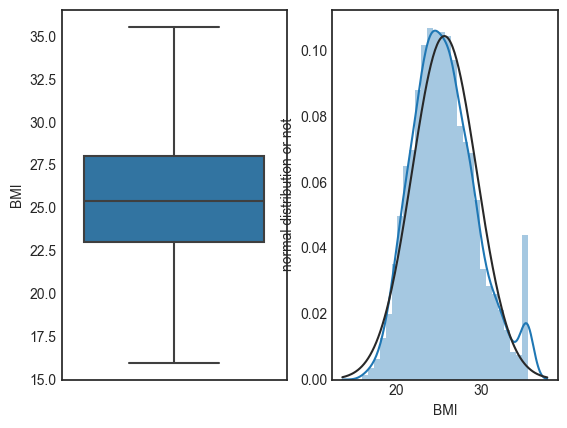

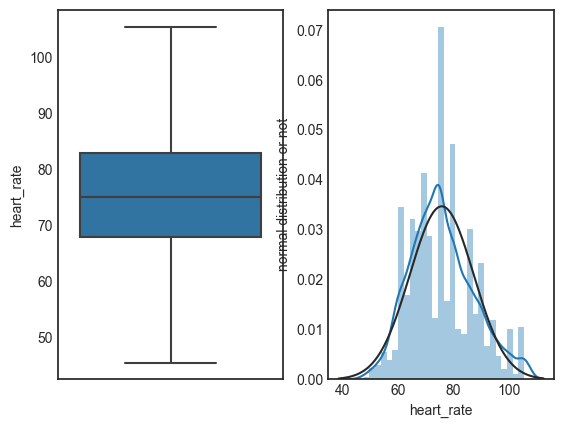

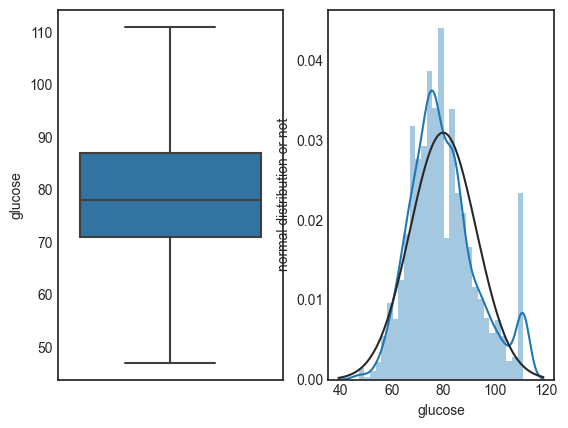

In [135]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(15, 10))

features = numeric_features

for i, feature in enumerate(features):
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[feature])
    fig.set_title('')
    fig.set_ylabel(feature)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[feature].dropna(), fit=norm)
    fig.set_ylabel('normal distribution or not')
    fig.set_xlabel(feature)

    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

Clipping Method: In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

### 3. Categorical Encoding

In [79]:
# Encode your categorical columns

In [140]:
df.dtypes

id                     int64
age                    int64
education            float64
sex                  float64
smoker                 int64
cigs_per_day         float64
BPMeds               float64
prevalent_stroke       int64
prevalent_hyp          int64
diabetes               int64
total_cholesterol    float64
systolic_bp          float64
diastolic_bp         float64
BMI                  float64
heart_rate           float64
glucose              float64
ten_year_chd           int64
dtype: object

In [139]:


df['sex'] = df['sex'].map({'M':1, 'F':0})
df['smoker'] = df['smoker'].map({'YES':1, 'NO':0})

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

Except for the 'sex' and 'is_smoking' columns, almost all of the categories in the dataset are already represented numerically (ordinal). Therefore, we are encoding these two columns.
Checking if one hot encoding is required in any feature or not


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [80]:
# Expand Contraction

#### 2. Lower Casing

In [81]:
# Lower Casing

#### 3. Removing Punctuations

In [82]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [83]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [84]:
# Remove Stopwords

In [85]:
# Remove White spaces

#### 6. Rephrase Text

In [86]:
# Rephrase Text

#### 7. Tokenization

In [87]:
# Tokenization

#### 8. Text Normalization

In [88]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [89]:
# POS Taging

#### 10. Text Vectorization

In [90]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [91]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [92]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [93]:
# Transform Your data

### 6. Data Scaling

In [94]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [95]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [96]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [97]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [98]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [103]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [104]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [106]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [107]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***